1. Import Packages and Read Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
mall_customers = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/refs/heads/master/Datasets/Mall_Customers.csv")

In [ ]:
mall_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2. Is there any Null Values ?

In [ ]:
mall_customers.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


##### 3. EDA
  * Exploratory Data Analysis

<Axes: xlabel='Gender', ylabel='count'>

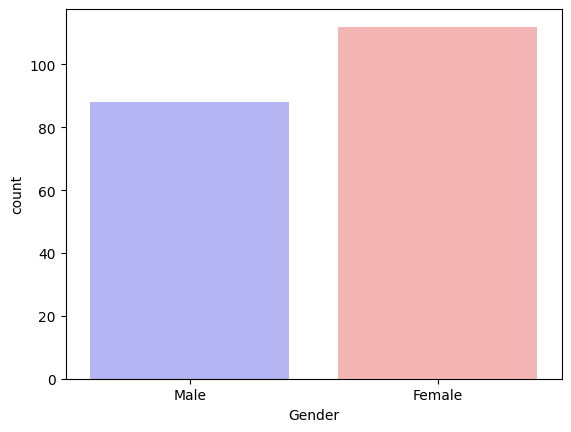

In [ ]:
sns.countplot(x = mall_customers['Gender'], palette='bwr')

<Axes: xlabel='Annual Income (k$)', ylabel='count'>

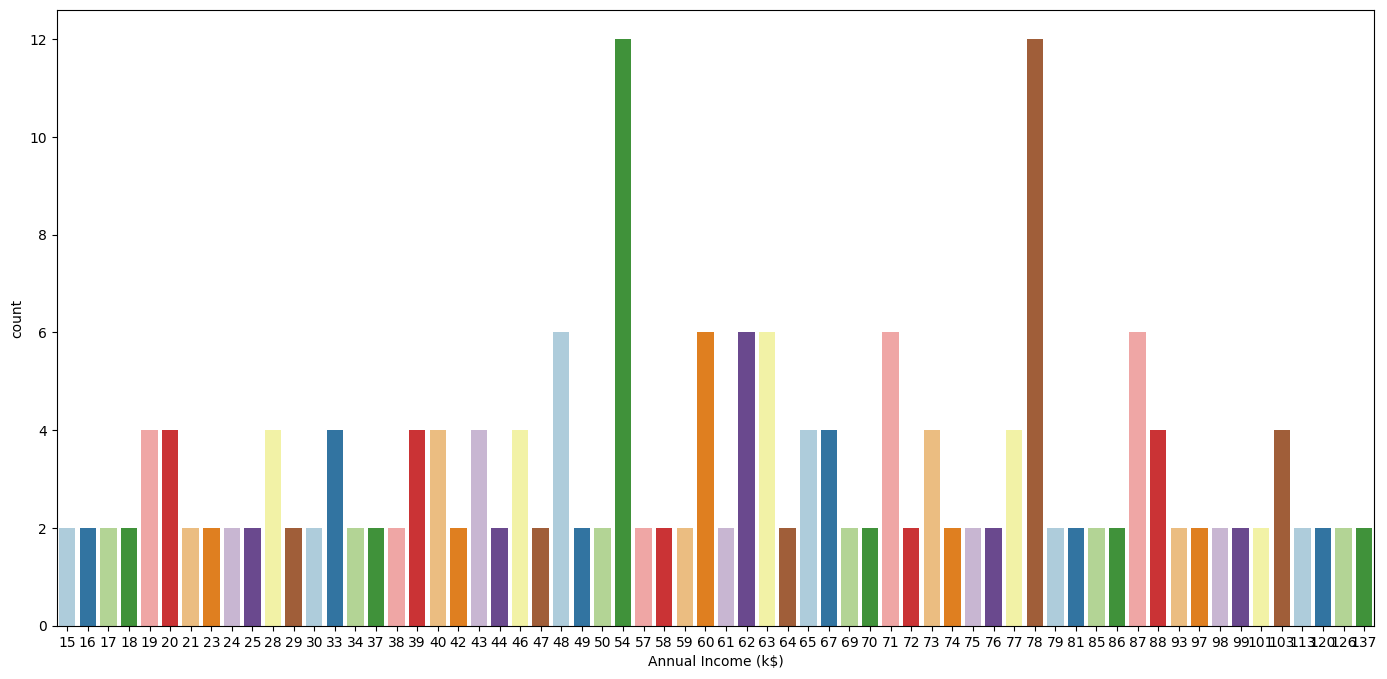

In [ ]:
plt.figure(figsize = (17,8))
sns.countplot(x = mall_customers['Annual Income (k$)'], palette='Paired')

<Axes: xlabel='Spending Score (1-100)', ylabel='count'>

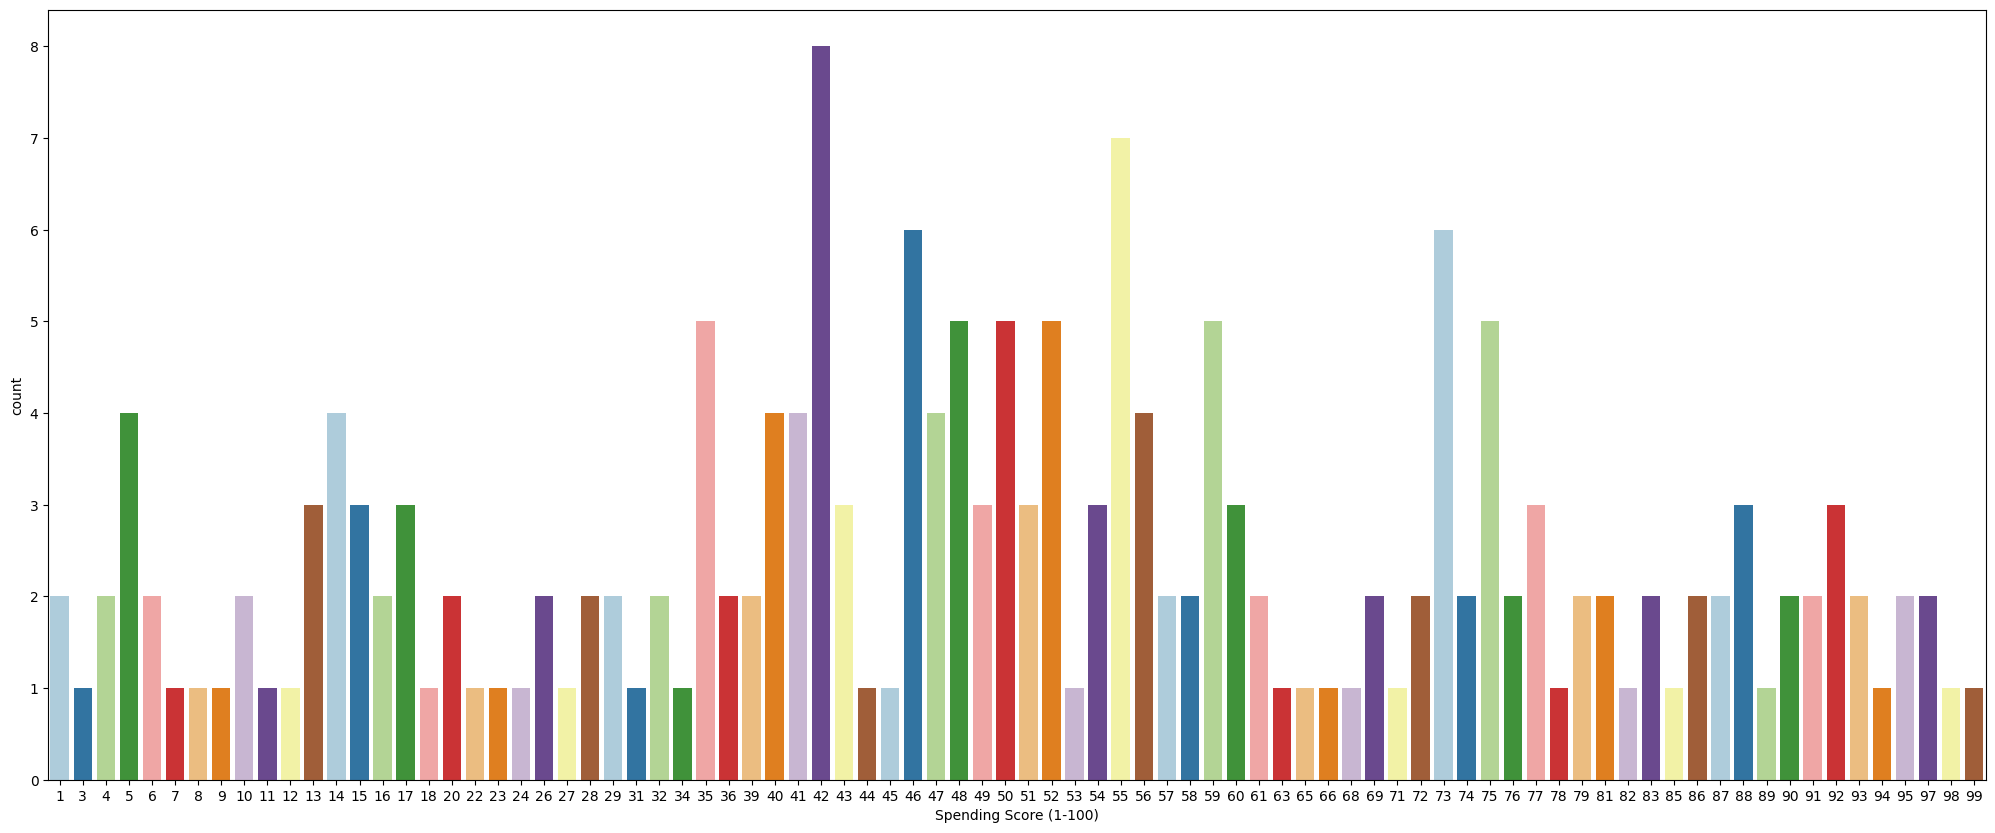

In [ ]:
plt.figure(figsize = (25,10))
sns.countplot(x = mall_customers['Spending Score (1-100)'], palette='Paired')

##### 4. Select Features

In [ ]:
X = mall_customers.loc[:,['Annual Income (k$)','Spending Score (1-100)']]

##### 5. Elbow Method

In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,16):
  # n_clusters = Number of Clusters to form using centroidal values (cluster centroids)
  # init = 'k-means++' Method to choose initial cluster data points (centroids)
  # n_init = Number of times alogorithm will iterate with different centroidal values from sample to initialize final centroidal value.
  # random_state = Fix the randomization
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 2)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

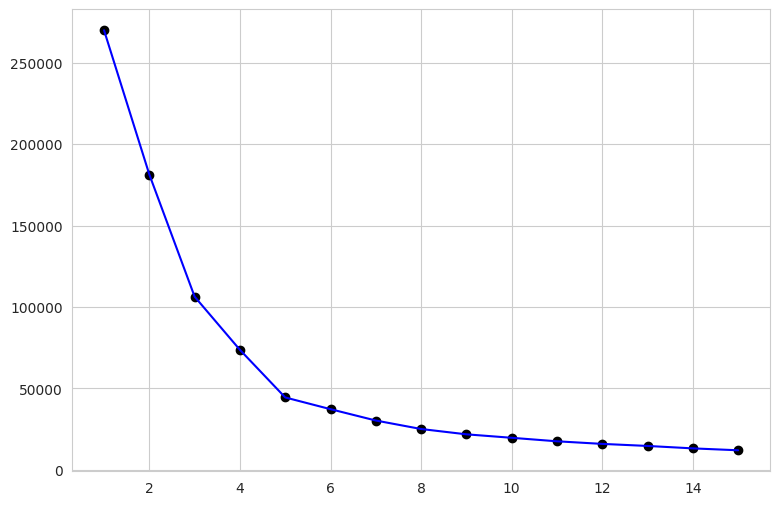

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (9,6))
plt.plot(range(1,16), wcss, color = 'b')
plt.scatter(range(1,16), wcss, color = 'k')
plt.show()

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator
knee = KneeLocator(range(1,16), wcss, curve = 'convex', direction = 'decreasing')

In [ ]:
print(knee.knee)

5


6. Create Final Model using : Optimum Number of Clusters = 5

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 2)
kmeans.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=2)

In [ ]:
y_clusters = kmeans.predict(X)
y_clusters

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [ ]:
kmeans.cluster_centers_         # cluster centroids

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636]])

##### 7. Plotting Cluster

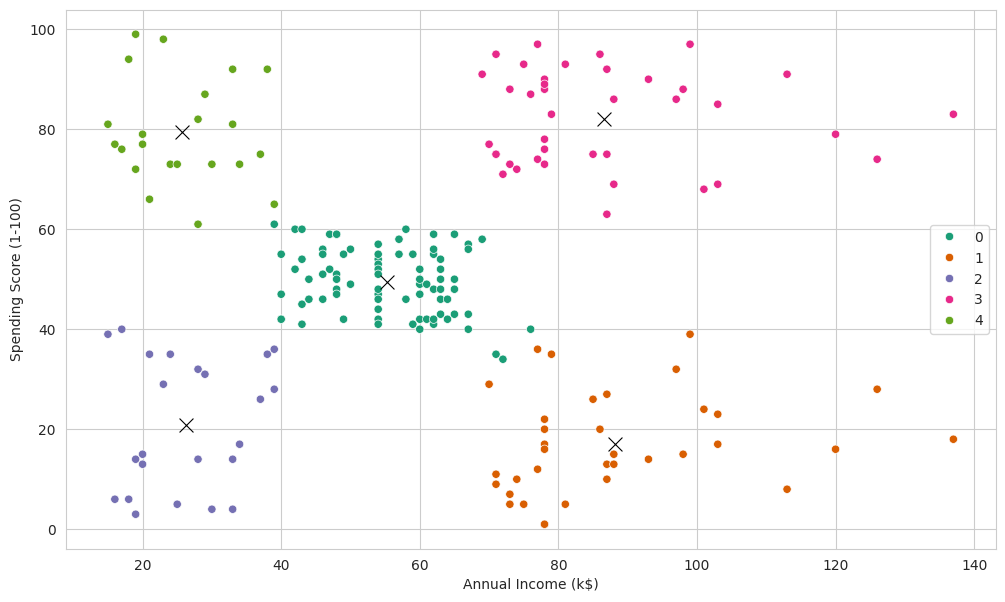

In [ ]:
plt.figure(figsize = (12,7))
sns.scatterplot(x = X['Annual Income (k$)'], y = X['Spending Score (1-100)'], hue = y_clusters, palette = 'Dark2')
sns.scatterplot(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], color='black', marker='x', s=100)
plt.show()

8. Clustering Performance

In [ ]:
from sklearn.metrics import silhouette_score
# Range: -1 to +1, Closer to +1 : Better separation & cohesion.
silhouette_score(X, y_clusters)

np.float64(0.553931997444648)

9. Hierarchical Clustering
  * Agglomerative Clustering
  * Divisive Clustering

In [ ]:
from seaborn.matrix import dendrogram
import scipy.cluster.hierarchy as sch

Plot Dendogram

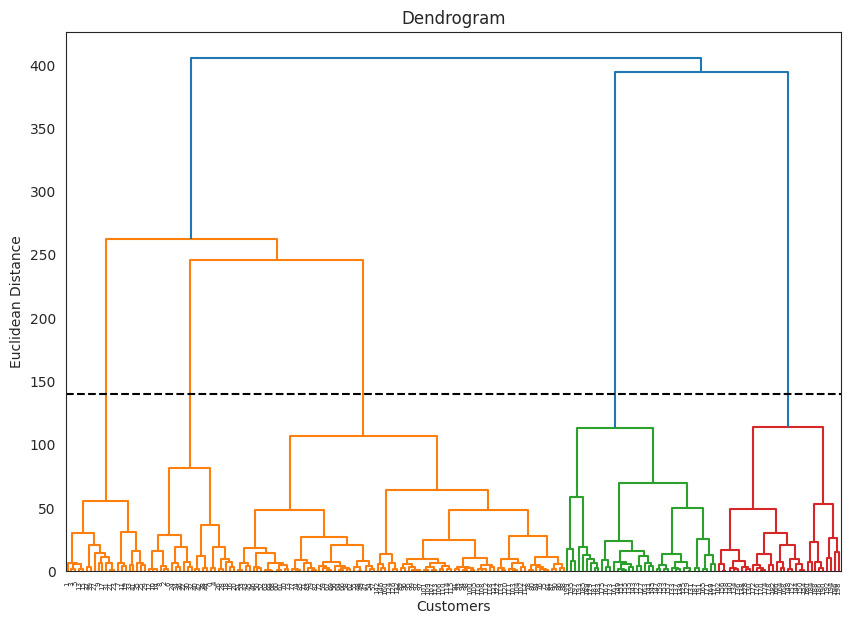

In [ ]:
sns.set_style('white')
plt.figure(figsize = (10,7))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(y = 140, color = 'k', linestyle = '--')
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

Plotting Clusters

In [ ]:
X['Cluster'] = y_hc

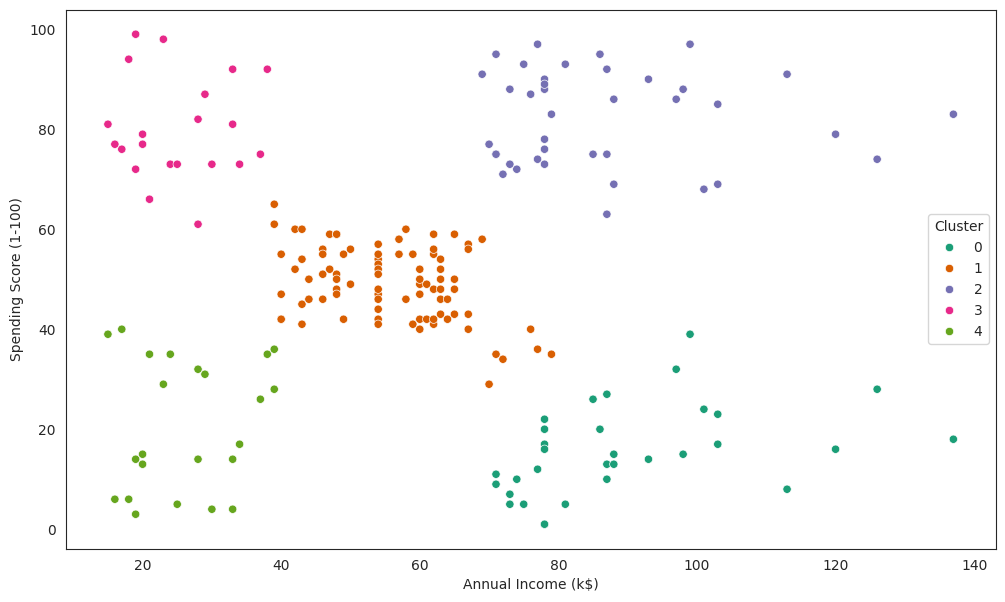

In [ ]:
plt.figure(figsize = (12,7))
sns.scatterplot(x = X['Annual Income (k$)'] , y = X['Spending Score (1-100)'],hue = X['Cluster'],palette='Dark2')
plt.show()

10. Model Evaluation - Silhautte Score

In [ ]:
from sklearn.metrics import silhouette_score
# Range: -1 to +1, Closer to +1 : Better separation & cohesion.
silhouette_score(X, y_hc)

np.float64(0.5537060749833154)